C:\Users\DELL\AppData\Local\Temp\ipykernel_23492\3137976326.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered[column] = le.fit_transform(data_filtered[column])
C:\Users\DELL\AppData\Local\Temp\ipykernel_23492\3137976326.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered[column] = le.fit_transform(data_filtered[column])
C:\Users\DELL\AppData\Local\Temp\ipykernel_23492\3137976326.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

SVM Classifier Report:
              precision    recall  f1-score   support

           0       0.67      0.98      0.80      8044
           1       0.35      0.02      0.03      3956

    accuracy                           0.67     12000
   macro avg       0.51      0.50      0.41     12000
weighted avg       0.56      0.67      0.55     12000

Accuracy 0.6654166666666667
Confusion Matrix:
 [[7919  125]
 [3890   66]]


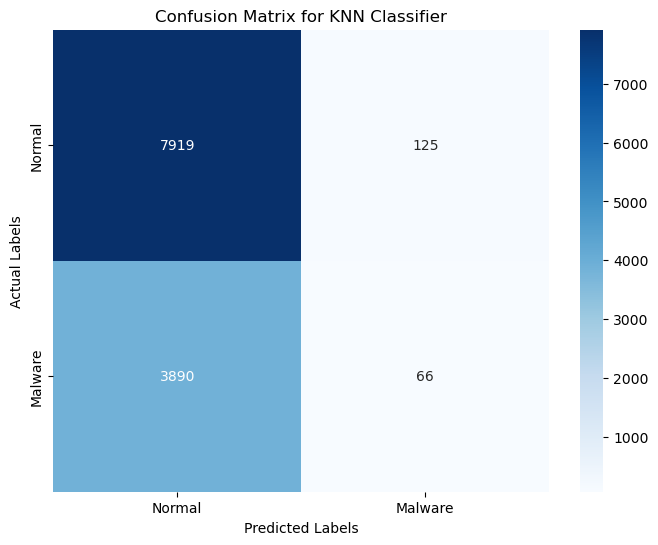

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import seaborn as sns


file_path = '../sample_dataset/updated_cybersecurity_attacks.csv'
data = pd.read_csv(file_path)


features = [
    'Protocol', 'Traffic Type', 'Action Taken', 'Severity Level', 
    'Log Source', 'Geo-location Data', 'Packet Length', 'Anomaly Scores', 
    'Malware Indicators', 'Alerts/Warnings'
]
target = 'Attack Type'


required_columns = features + [target]
data_filtered = data[required_columns]


encoders = {}
for column in ['Protocol', 'Traffic Type', 'Action Taken', 'Severity Level', 
               'Log Source', 'Geo-location Data', 'Malware Indicators', 'Alerts/Warnings']:
    le = LabelEncoder()
    data_filtered[column] = le.fit_transform(data_filtered[column])
    encoders[column] = le


scaler = StandardScaler()
data_filtered[['Packet Length', 'Anomaly Scores']] = scaler.fit_transform(
    data_filtered[['Packet Length', 'Anomaly Scores']]
)

# Convert target to binary classification (e.g., 'Malware' vs 'Normal')
data_filtered['Binary Attack Type'] = (data_filtered[target] == 'Malware').astype(int)


X = data_filtered[features]
y = data_filtered['Binary Attack Type']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


svm_classifier = SVC(kernel = 'linear', random_state=42)
svm_classifier.fit(X_train, y_train)

y_pred = svm_classifier.predict(X_test)

print("SVM Classifier Report:")
print(classification_report(y_test, y_pred))
print("Accuracy", accuracy_score(y_test, y_pred))


# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(
    cm, annot=True, fmt="d", cmap="Blues", 
    xticklabels=['Normal', 'Malware'], yticklabels=['Normal', 'Malware']
)
plt.title("Confusion Matrix for KNN Classifier")
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.show()


C:\Users\DELL\AppData\Local\Temp\ipykernel_23492\2051352068.py:37: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.66929478  0.94353482 -1.14280809 ...  0.62866049 -0.7173672
  0.94593844]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data_filtered.loc[:, ['Packet Length', 'Anomaly Scores']] = scaler.fit_transform(
C:\Users\DELL\AppData\Local\Temp\ipykernel_23492\2051352068.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['Malware Indicators'] = (data_filtered[target] == 'IoC Detected').astype(int)


SVM Classifier Report:
              precision    recall  f1-score   support

           0       0.50      0.18      0.26      6032
           1       0.50      0.82      0.62      5968

    accuracy                           0.50     12000
   macro avg       0.50      0.50      0.44     12000
weighted avg       0.50      0.50      0.44     12000

Accuracy 0.49725

Classification Report for KNN:
               precision    recall  f1-score   support

No Detection       0.50      0.18      0.26      6032
IoC Detected       0.50      0.82      0.62      5968

    accuracy                           0.50     12000
   macro avg       0.50      0.50      0.44     12000
weighted avg       0.50      0.50      0.44     12000

Confusion Matrix:
 [[1069 4963]
 [1070 4898]]


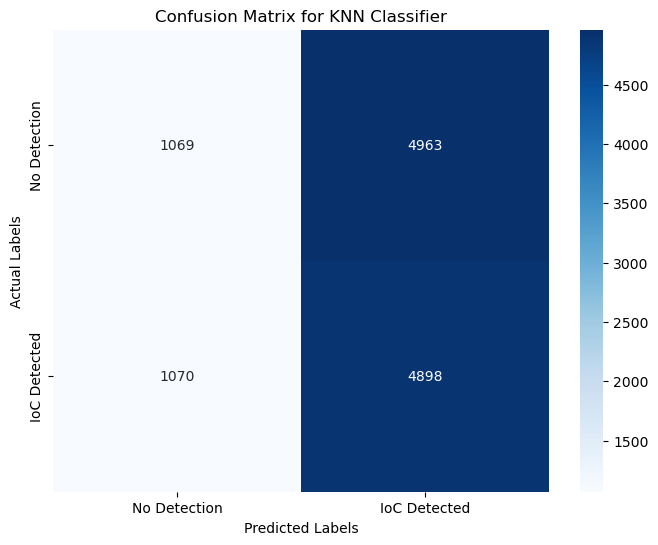

In [ ]:
# Selected the Malware Indicator as the Target class

import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import seaborn as sns


file_path = '../sample_dataset/updated_cybersecurity_attacks.csv'
data = pd.read_csv(file_path)


features = [
    'Protocol', 'Traffic Type', 'Action Taken', 'Severity Level', 
    'Log Source', 'Geo-location Data', 'Packet Length', 'Anomaly Scores', 
    'Alerts/Warnings'
]
target = 'Malware Indicators' 


required_columns = features + [target]
data_filtered = data[required_columns]


encoders = {}
for column in ['Protocol', 'Traffic Type', 'Action Taken', 'Severity Level', 
               'Log Source', 'Geo-location Data', 'Alerts/Warnings']:  
    le = LabelEncoder()
    data_filtered.loc[:, column] = le.fit_transform(data_filtered[column])
    encoders[column] = le


scaler = StandardScaler()
data_filtered.loc[:, ['Packet Length', 'Anomaly Scores']] = scaler.fit_transform(
    data_filtered[['Packet Length', 'Anomaly Scores']]
)

# Convert Malware Indicators to binary classification (0: No Detection, 1: IoC Detected)
data_filtered['Malware Indicators'] = (data_filtered[target] == 'IoC Detected').astype(int)


X = data_filtered[features]
y = data_filtered['Malware Indicators']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


svm_classifier = SVC(kernel = 'linear', random_state=42)
svm_classifier.fit(X_train, y_train)

y_pred = svm_classifier.predict(X_test)

print("SVM Classifier Report:")
print(classification_report(y_test, y_pred))
print("Accuracy", accuracy_score(y_test, y_pred))


classification_report_knn = classification_report(
    y_test, y_pred, target_names=['No Detection', 'IoC Detected'], labels=[0, 1]
)

print("\nClassification Report for SVM:\n", classification_report_knn)


cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)


plt.figure(figsize=(8, 6))
sns.heatmap(
    cm, annot=True, fmt="d", cmap="Blues", 
    xticklabels=['No Detection', 'IoC Detected'], yticklabels=['No Detection', 'IoC Detected']
)
plt.title("Confusion Matrix for SVM Classifier")
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.show()


In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import seaborn as sns


file_path = '../sample_dataset/updated_cybersecurity_attacks.csv'

data = pd.read_csv(file_path)

features = [
    'Protocol', 'Traffic Type', 'Action Taken', 'Log Source', 'Geo-location Data', 
    'Packet Length', 'Anomaly Scores', 'Severity Level', 'Alerts/Warnings'
]
target = 'Malware Indicators'

required_columns = features + [target]
data_filtered = data[required_columns]


encoders = {}
for column in ['Protocol', 'Traffic Type', 'Action Taken', 'Log Source', 
               'Geo-location Data', 'Severity Level', 'Alerts/Warnings']:
    le = LabelEncoder()
    data_filtered[column] = le.fit_transform(data_filtered[column])
    encoders[column] = le


scaler = StandardScaler()
data_filtered[['Packet Length', 'Anomaly Scores']] = scaler.fit_transform(data_filtered[['Packet Length', 'Anomaly Scores']])


# Convert the target 'Malware Indicators' to numerical encoding
encoder = LabelEncoder()
data_filtered['Malware Indicators'] = encoder.fit_transform(data_filtered[target])

X = data_filtered[features]
y = data_filtered['Malware Indicators']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


svm_classifier = SVC(kernel = 'linear', random_state=42)
svm_classifier.fit(X_train, y_train)

y_pred = svm_classifier.predict(X_test)

print("SVM Classifier Report:")
print(classification_report(y_test, y_pred))
print("Accuracy", accuracy_score(y_test, y_pred))


classification_report_knn = classification_report(y_test, y_pred)

print("\nClassification Report for SVM:\n", classification_report_knn)


cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)




plt.figure(figsize=(8, 6))
sns.heatmap(
    cm, annot=True, fmt="d", cmap="Blues", 
    xticklabels=encoder.classes_, yticklabels=encoder.classes_
)
plt.title("Confusion Matrix for KNN Classifier")
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_8036\1107705742.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered[column] = le.fit_transform(data_filtered[column])
C:\Users\DELL\AppData\Local\Temp\ipykernel_8036\1107705742.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered[column] = le.fit_transform(data_filtered[column])
C:\Users\DELL\AppData\Local\Temp\ipykernel_8036\1107705742.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Tr

SVM Classifier Report:
              precision    recall  f1-score   support

           0       0.50      0.87      0.63      5968
           1       0.50      0.13      0.20      6032

    accuracy                           0.50     12000
   macro avg       0.50      0.50      0.42     12000
weighted avg       0.50      0.50      0.42     12000



NameError: name 'accuracy_score' is not defined